# Recomendador de Peliculas

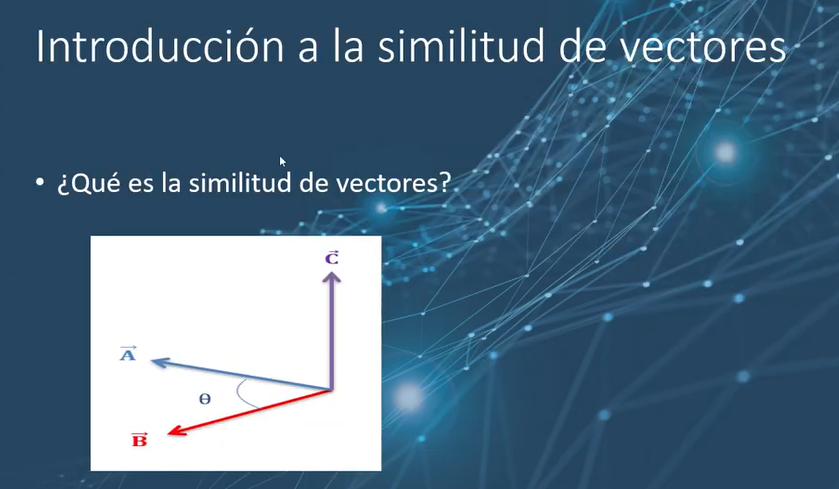

Recordar que en contexto de Procesamiento de Lenguaje Natural es la tokenización de un texto convertido a vector

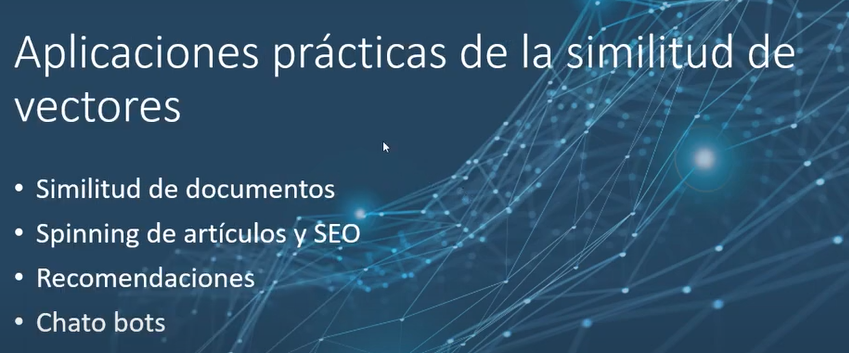

Ver la Simmilitud de los documentos atravez de los vectores de cada documento

Spinning de articulos es tratar de hacer que un artículo no sea lo mismo variarlo pero que trate de lo mismo

Recomendaciones: Por ejemplo Netflix apartir de los reviews y textos de las peliculas que pelicula te va arecomendar \b
en base a las peliiculas que ya hayas visto

Chatbots: Toma tu pregunta la vectoriza y busca en su base de datos vectorizada y te mandar la respuesta en base a la pregunta que más se haya parecido

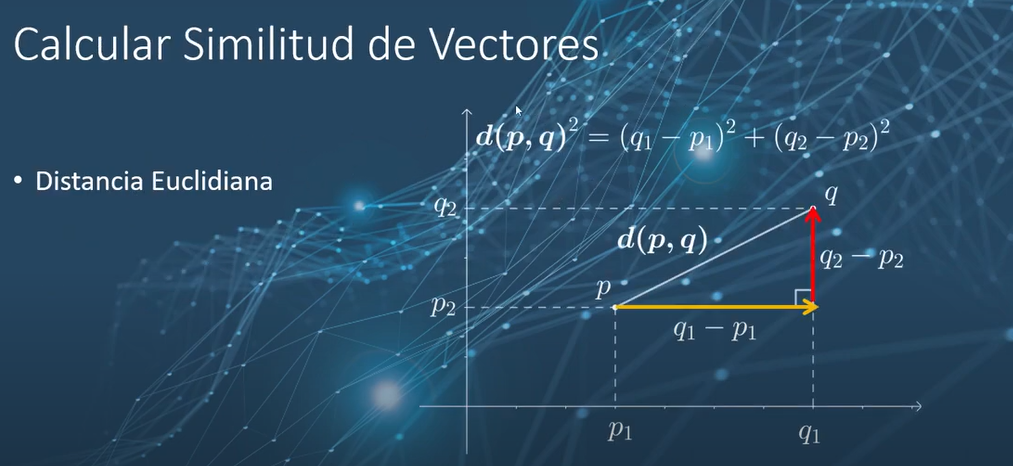

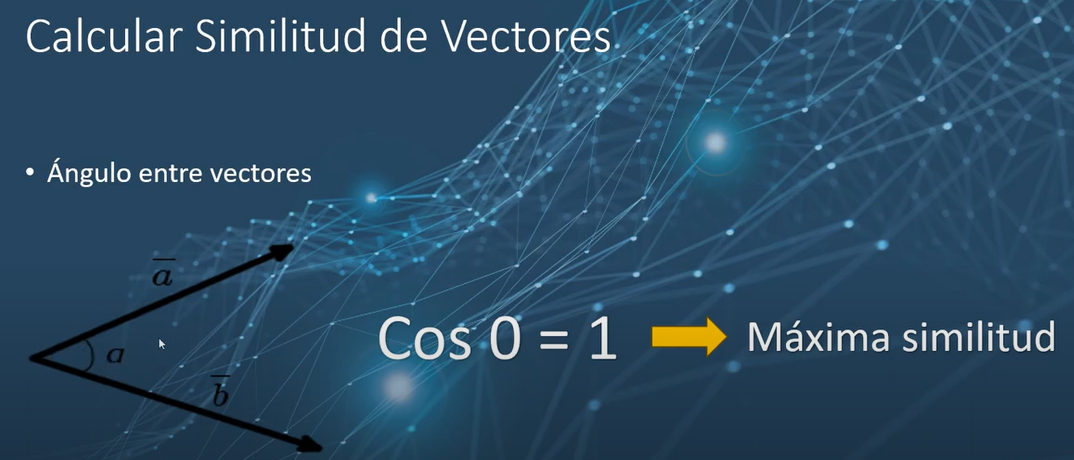

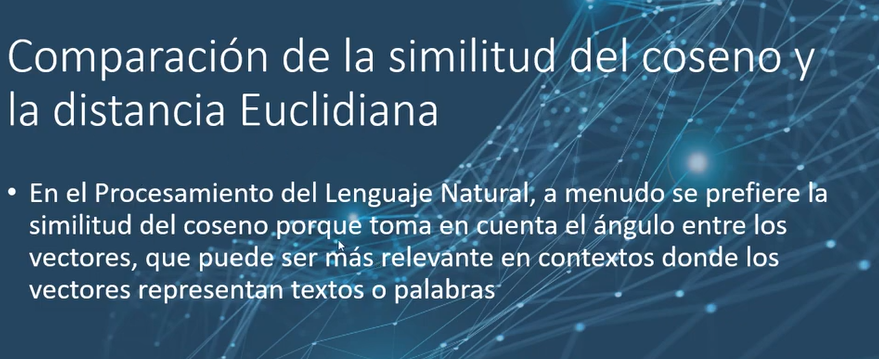

# TF-IDF

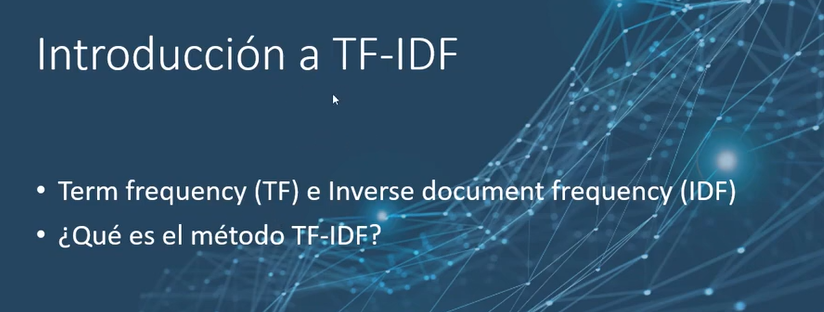

Es una tecnica en NLP pára representar que tan importante es una palabra

A cada palabra del documento se le indica un puntaje en base a esta info

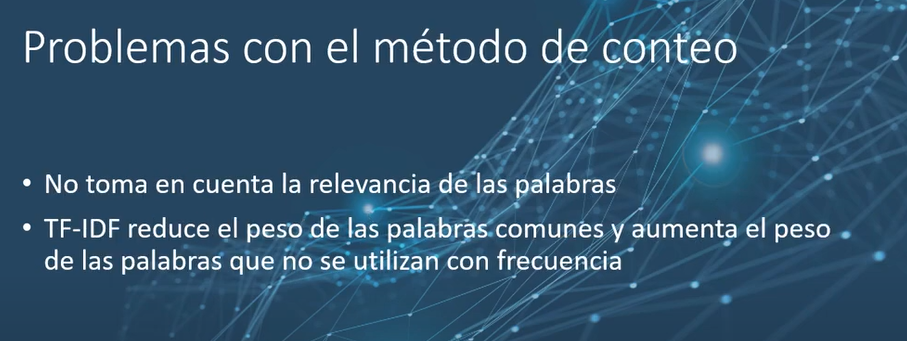

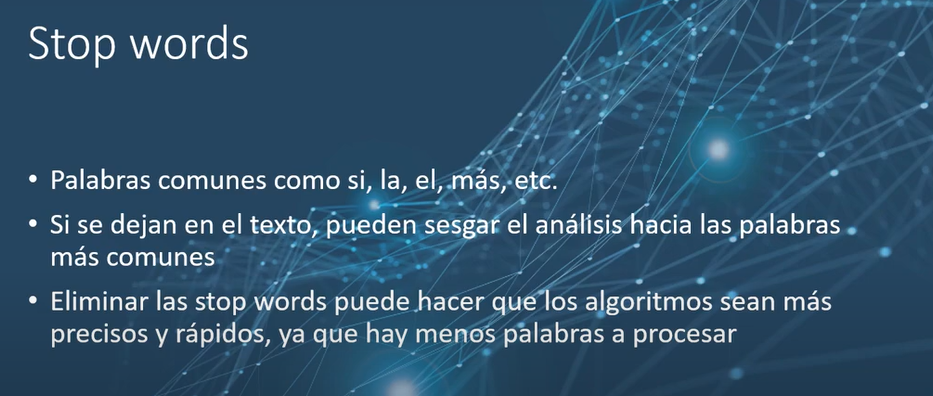

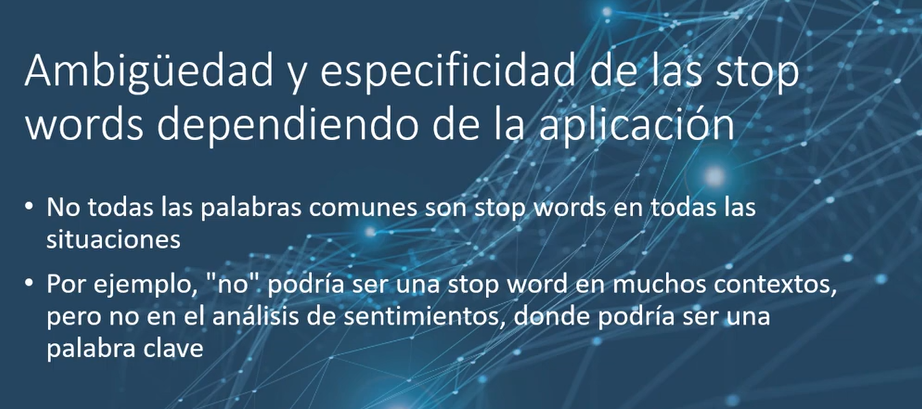

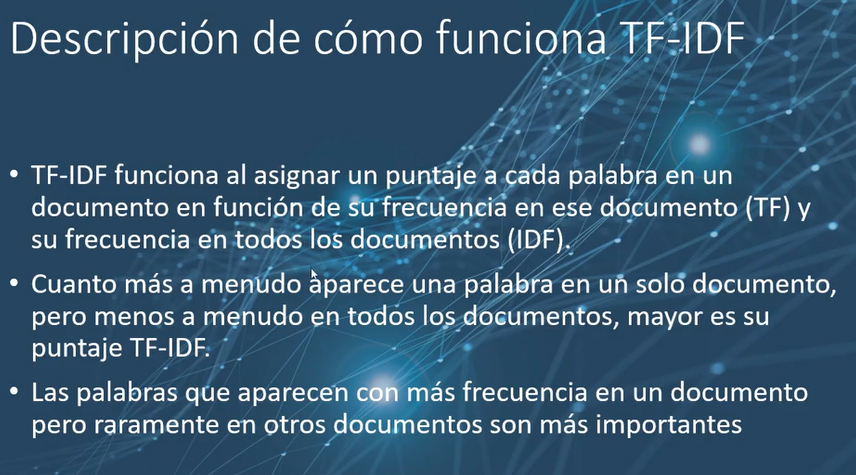

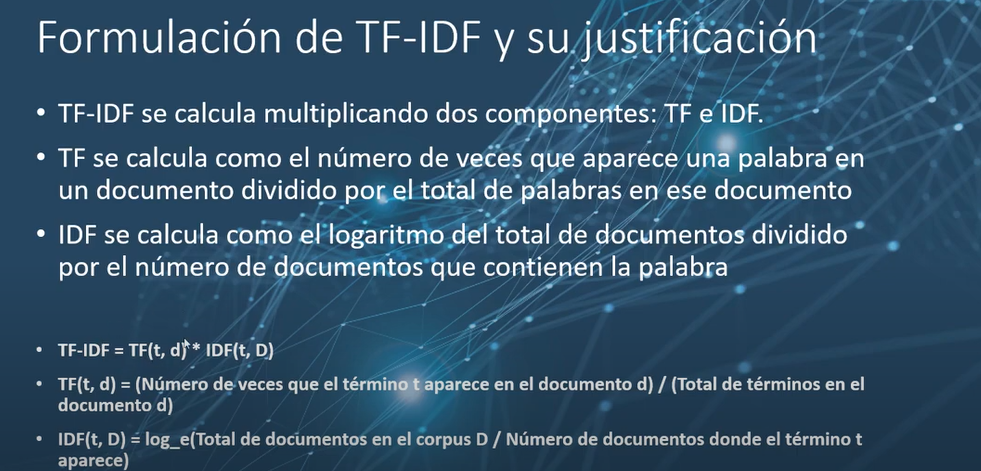

In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('movie_metadata.csv')
df

color                                        movie_title  \
0     Color                                            Avatar    
1     Color          Pirates of the Caribbean: At World's End    
2     Color                                           Spectre    
3     Color                             The Dark Knight Rises    
4       NaN  Star Wars: Episode VII - The Force Awakens    ...   
...     ...                                                ...   
5038  Color                           Signed Sealed Delivered    
5039  Color                         The Following                
5040  Color                              A Plague So Pleasant    
5041  Color                                  Shanghai Calling    
5042  Color                                 My Date with Drew    

                               genero  \
0     Action|Adventure|Fantasy|Sci-Fi   
1            Action|Adventure|Fantasy   
2           Action|Adventure|Thriller   
3                     Action|Thriller   
4                         Documentary   
...                               ...   
5038                     Comedy|Drama   
5039     Crime|Drama|Mystery|Thriller   
5040            Drama|Horror|Thriller   
5041             Comedy|Drama|Romance   
5042                      Documentary   

                                          plot_keywords  \
0                avatar|future|marine|native|paraplegic   
1     goddess|marriage ceremony|marriage proposal|pi...   
2                   bomb|espionage|sequel|spy|terrorist   
3     deception|imprisonment|lawlessness|police offi...   
4                                                   NaN   
...                                                 ...   
5038             fraud|postal worker|prison|theft|trial   
5039       cult|fbi|hideout|prison escape|serial killer   
5040                                                NaN   
5041                                                NaN   
5042  actress name in title|crush|date|four word tit...   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5038                      2.0                   318.0     Daphne Zuniga   
5039                      NaN                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross  Unnamed: 9  ...  \
0                     1000.0  760505847.0         NaN  ...   
1                    40000.0  309404152.0         NaN  ...   
2                    11000.0  200074175.0         NaN  ...   
3                    27000.0  448130642.0         NaN  ...   
4                      131.0          NaN         NaN  ...   
...                      ...          ...         ...  ...   
5038                   637.0          NaN         NaN  ...   
5039                   841.0          NaN         NaN  ...   
5040                     0.0          NaN         NaN  ...   
5041                   946.0      10443.0         NaN  ...   
5042                    86.0      85222.0         NaN  ...   

     num_user_for_reviews  language  country  content_rating       budget  \
0                  3054.0   English      USA           PG-13  237000000.0   
1                  1238.0   English      USA           PG-13  300000000.0   
2                   994.0   English       UK           PG-13  245000000.0   
3                  2701.0   English      USA           PG

In [41]:
df['genero'] = df['genero'].str.replace('|',' ')
df

color                                        movie_title  \
0     Color                                            Avatar    
1     Color          Pirates of the Caribbean: At World's End    
2     Color                                           Spectre    
3     Color                             The Dark Knight Rises    
4       NaN  Star Wars: Episode VII - The Force Awakens    ...   
...     ...                                                ...   
5038  Color                           Signed Sealed Delivered    
5039  Color                         The Following                
5040  Color                              A Plague So Pleasant    
5041  Color                                  Shanghai Calling    
5042  Color                                 My Date with Drew    

                               genero  \
0     Action Adventure Fantasy Sci-Fi   
1            Action Adventure Fantasy   
2           Action Adventure Thriller   
3                     Action Thriller   
4                         Documentary   
...                               ...   
5038                     Comedy Drama   
5039     Crime Drama Mystery Thriller   
5040            Drama Horror Thriller   
5041             Comedy Drama Romance   
5042                      Documentary   

                                          plot_keywords  \
0                avatar|future|marine|native|paraplegic   
1     goddess|marriage ceremony|marriage proposal|pi...   
2                   bomb|espionage|sequel|spy|terrorist   
3     deception|imprisonment|lawlessness|police offi...   
4                                                   NaN   
...                                                 ...   
5038             fraud|postal worker|prison|theft|trial   
5039       cult|fbi|hideout|prison escape|serial killer   
5040                                                NaN   
5041                                                NaN   
5042  actress name in title|crush|date|four word tit...   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5038                      2.0                   318.0     Daphne Zuniga   
5039                      NaN                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross  Unnamed: 9  ...  \
0                     1000.0  760505847.0         NaN  ...   
1                    40000.0  309404152.0         NaN  ...   
2                    11000.0  200074175.0         NaN  ...   
3                    27000.0  448130642.0         NaN  ...   
4                      131.0          NaN         NaN  ...   
...                      ...          ...         ...  ...   
5038                   637.0          NaN         NaN  ...   
5039                   841.0          NaN         NaN  ...   
5040                     0.0          NaN         NaN  ...   
5041                   946.0      10443.0         NaN  ...   
5042                    86.0      85222.0         NaN  ...   

     num_user_for_reviews  language  country  content_rating       budget  \
0                  3054.0   English      USA           PG-13  237000000.0   
1                  1238.0   English      USA           PG-13  300000000.0   
2                   994.0   English       UK           PG-13  245000000.0   
3                  2701.0   English      USA           PG

In [42]:
df['plot_keywords'] = df['plot_keywords'].str.replace('|',' ')
df

color                                        movie_title  \
0     Color                                            Avatar    
1     Color          Pirates of the Caribbean: At World's End    
2     Color                                           Spectre    
3     Color                             The Dark Knight Rises    
4       NaN  Star Wars: Episode VII - The Force Awakens    ...   
...     ...                                                ...   
5038  Color                           Signed Sealed Delivered    
5039  Color                         The Following                
5040  Color                              A Plague So Pleasant    
5041  Color                                  Shanghai Calling    
5042  Color                                 My Date with Drew    

                               genero  \
0     Action Adventure Fantasy Sci-Fi   
1            Action Adventure Fantasy   
2           Action Adventure Thriller   
3                     Action Thriller   
4                         Documentary   
...                               ...   
5038                     Comedy Drama   
5039     Crime Drama Mystery Thriller   
5040            Drama Horror Thriller   
5041             Comedy Drama Romance   
5042                      Documentary   

                                          plot_keywords  \
0                avatar future marine native paraplegic   
1     goddess marriage ceremony marriage proposal pi...   
2                   bomb espionage sequel spy terrorist   
3     deception imprisonment lawlessness police offi...   
4                                                   NaN   
...                                                 ...   
5038             fraud postal worker prison theft trial   
5039       cult fbi hideout prison escape serial killer   
5040                                                NaN   
5041                                                NaN   
5042  actress name in title crush date four word tit...   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5038                      2.0                   318.0     Daphne Zuniga   
5039                      NaN                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross  Unnamed: 9  ...  \
0                     1000.0  760505847.0         NaN  ...   
1                    40000.0  309404152.0         NaN  ...   
2                    11000.0  200074175.0         NaN  ...   
3                    27000.0  448130642.0         NaN  ...   
4                      131.0          NaN         NaN  ...   
...                      ...          ...         ...  ...   
5038                   637.0          NaN         NaN  ...   
5039                   841.0          NaN         NaN  ...   
5040                     0.0          NaN         NaN  ...   
5041                   946.0      10443.0         NaN  ...   
5042                    86.0      85222.0         NaN  ...   

     num_user_for_reviews  language  country  content_rating       budget  \
0                  3054.0   English      USA           PG-13  237000000.0   
1                  1238.0   English      USA           PG-13  300000000.0   
2                   994.0   English       UK           PG-13  245000000.0   
3                  2701.0   English      USA           PG

In [43]:
df['texto'] = df[['genero','plot_keywords']].apply(lambda row: ' '.join(row.values.astype(str)),axis=1)
df

color                                        movie_title  \
0     Color                                            Avatar    
1     Color          Pirates of the Caribbean: At World's End    
2     Color                                           Spectre    
3     Color                             The Dark Knight Rises    
4       NaN  Star Wars: Episode VII - The Force Awakens    ...   
...     ...                                                ...   
5038  Color                           Signed Sealed Delivered    
5039  Color                         The Following                
5040  Color                              A Plague So Pleasant    
5041  Color                                  Shanghai Calling    
5042  Color                                 My Date with Drew    

                               genero  \
0     Action Adventure Fantasy Sci-Fi   
1            Action Adventure Fantasy   
2           Action Adventure Thriller   
3                     Action Thriller   
4                         Documentary   
...                               ...   
5038                     Comedy Drama   
5039     Crime Drama Mystery Thriller   
5040            Drama Horror Thriller   
5041             Comedy Drama Romance   
5042                      Documentary   

                                          plot_keywords  \
0                avatar future marine native paraplegic   
1     goddess marriage ceremony marriage proposal pi...   
2                   bomb espionage sequel spy terrorist   
3     deception imprisonment lawlessness police offi...   
4                                                   NaN   
...                                                 ...   
5038             fraud postal worker prison theft trial   
5039       cult fbi hideout prison escape serial killer   
5040                                                NaN   
5041                                                NaN   
5042  actress name in title crush date four word tit...   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                         0.0                   855.0  Joel David Moore   
1                       563.0                  1000.0     Orlando Bloom   
2                         0.0                   161.0      Rory Kinnear   
3                     22000.0                 23000.0    Christian Bale   
4                       131.0                     NaN        Rob Walker   
...                       ...                     ...               ...   
5038                      2.0                   318.0     Daphne Zuniga   
5039                      NaN                   319.0     Valorie Curry   
5040                      0.0                     0.0     Maxwell Moody   
5041                      0.0                   489.0     Daniel Henney   
5042                     16.0                    16.0  Brian Herzlinger   

      actor_1_facebook_likes        gross  Unnamed: 9  ... language  country  \
0                     1000.0  760505847.0         NaN  ...  English      USA   
1                    40000.0  309404152.0         NaN  ...  English      USA   
2                    11000.0  200074175.0         NaN  ...  English       UK   
3                    27000.0  448130642.0         NaN  ...  English      USA   
4                      131.0          NaN         NaN  ...      NaN      NaN   
...                      ...          ...         ...  ...      ...      ...   
5038                   637.0          NaN         NaN  ...  English   Canada   
5039                   841.0          NaN         NaN  ...  English      USA   
5040                     0.0          NaN         NaN  ...  English      USA   
5041                   946.0      10443.0         NaN  ...  English      USA   
5042                    86.0      85222.0         NaN  ...  English      USA   

      content_rating       budget title_year  actor_2_facebook_likes  \
0              PG-13  237000000.0     2009.0                   936.0   
1    

In [44]:
row = df[['genero','plot_keywords', 'texto']].iloc[0]
print(row)

genero                             Action Adventure Fantasy Sci-Fi
plot_keywords               avatar future marine native paraplegic
texto            Action Adventure Fantasy Sci-Fi avatar future ...
Name: 0, dtype: object


In [45]:
print(df['texto'].iloc[0])

Action Adventure Fantasy Sci-Fi avatar future marine native paraplegic


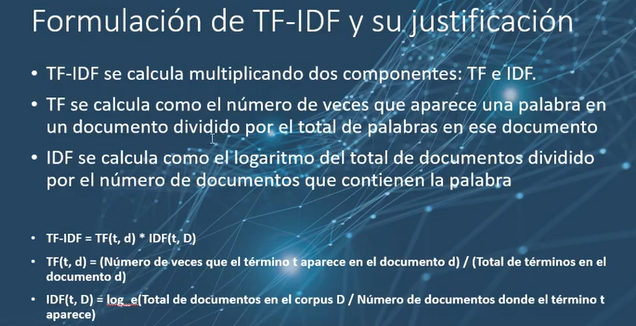

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [50]:
tfidf = TfidfVectorizer(max_features=2000)

In [52]:
X=tfidf.fit_transform(df['texto'])
X

<5043x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 44000 stored elements in Compressed Sparse Row format>

In [54]:
peliculas = pd.Series(df.index, index=df['movie_title'])
peliculas

movie_title
Avatar                                                        0
Pirates of the Caribbean: At World's End                      1
Spectre                                                       2
The Dark Knight Rises                                         3
Star Wars: Episode VII - The Force Awakens                    4
                                                           ... 
Signed Sealed Delivered                                    5038
The Following                                              5039
A Plague So Pleasant                                       5040
Shanghai Calling                                           5041
My Date with Drew                                          5042
Length: 5043, dtype: int64

In [56]:
peliculas.index = peliculas.index.str.strip()
peliculas

movie_title
Avatar                                           0
Pirates of the Caribbean: At World's End         1
Spectre                                          2
The Dark Knight Rises                            3
Star Wars: Episode VII - The Force Awakens       4
                                              ... 
Signed Sealed Delivered                       5038
The Following                                 5039
A Plague So Pleasant                          5040
Shanghai Calling                              5041
My Date with Drew                             5042
Length: 5043, dtype: int64

In [58]:
indice = peliculas['The Dark Knight Rises']
indice

3

In [60]:
consulta = X[indice]
consulta

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [62]:
print(consulta)

  (0, 32)	0.14997860517223982
  (0, 1797)	0.1379495887811173
  (0, 1782)	0.3445459446502384
  (0, 478)	0.46014136234826947
  (0, 886)	0.48056667678675813
  (0, 1356)	0.26474173139625884
  (0, 1245)	0.3738571275391204
  (0, 1349)	0.4327039179793776


In [64]:
consulta.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [66]:
similitud = cosine_similarity(consulta, X)
similitud

array([[0.02767798, 0.02180518, 0.18356101, ..., 0.05069847, 0.        ,
        0.        ]])

In [68]:
similitud[0][3]

1.0000000000000002

In [70]:
similitud = similitud.flatten()

In [72]:
similitud[3]

1.0000000000000002

In [74]:
!pip install matplotlib -q

In [76]:
import matplotlib.pyplot as plt


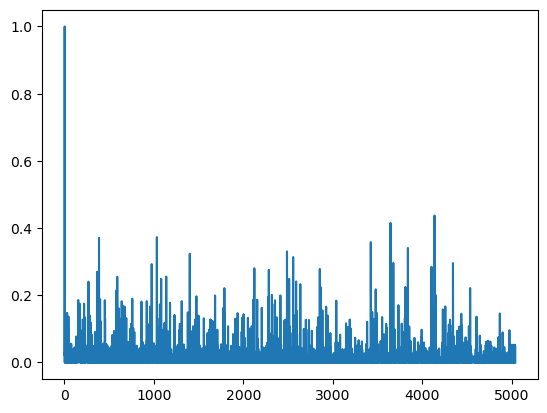

In [78]:
plt.plot(similitud)

In [80]:
 # Vamos ordenarlos de orden descendente
(-similitud).argsort()

array([   3, 4139, 3647, ..., 2380, 2363, 5042], dtype=int64)

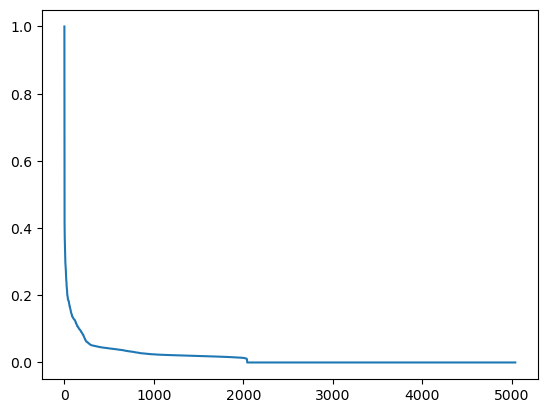

In [82]:
# Ahora vamos a graficar la similitud pero ordenadas ahora de Mayor a Menor
plt.plot(similitud[(-similitud).argsort()])

In [84]:
# Vamos a guardar los indices de las peliculas con más similitud
recomendacion = (-similitud).argsort()[1:11]


In [86]:
# Aquí mostramos las 10 peliculas que más se parecen
df['movie_title'].iloc[recomendacion]

4139            AWOL-72 
3647           Deadfall 
1034            The One 
387     The Devil's Own 
3426            Swelter 
3841     Police Academy 
2489      Let's Be Cops 
1402    Lethal Weapon 3 
2558           Hot Fuzz 
3678     Mambo Italiano 
Name: movie_title, dtype: object